# First Deep Learning Model

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets.samples_generator import make_circles

In [4]:
X, y = make_circles(n_samples=1000,
                    noise=0.1,
                    factor=0.2,
                    random_state=0)

In [5]:
X

array([[ 0.24265541,  0.0383196 ],
       [ 0.04433036, -0.05667334],
       [-0.78677748, -0.75718576],
       ..., 
       [ 0.0161236 , -0.00548034],
       [ 0.20624715,  0.09769677],
       [-0.19186631,  0.08916672]])

In [6]:
X.shape

(1000, 2)

In [7]:
y

array([1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0,

In [8]:
y.shape

(1000,)

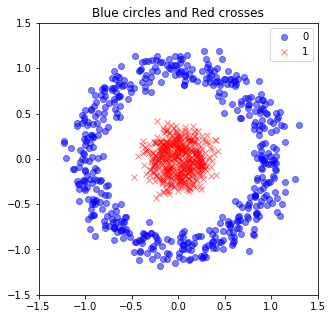

In [9]:
plt.figure(figsize=(5, 5))
plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.legend(['0', '1'])
plt.title("Blue circles and Red crosses")

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

Using TensorFlow backend.


In [11]:
model = Sequential()

In [12]:
model.add(Dense(4, input_shape=(2,), activation='tanh'))

In [13]:
model.add(Dense(1, activation='sigmoid'))

In [14]:
model.compile(SGD(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])

In [15]:
model.fit(X, y, epochs=20)

Epoch 1/20
1000/1000 [==============================] - 0s - loss: 0.7061 - acc: 0.6210     
Epoch 2/20
1000/1000 [==============================] - 0s - loss: 0.6288 - acc: 0.7270     
Epoch 3/20
1000/1000 [==============================] - 0s - loss: 0.5298 - acc: 0.8300     
Epoch 4/20
1000/1000 [==============================] - 0s - loss: 0.4428 - acc: 0.8620     
Epoch 5/20
1000/1000 [==============================] - 0s - loss: 0.3896 - acc: 0.8740     
Epoch 6/20
1000/1000 [==============================] - 0s - loss: 0.3451 - acc: 0.8730     
Epoch 7/20
1000/1000 [==============================] - 0s - loss: 0.2891 - acc: 0.8900     
Epoch 8/20
1000/1000 [==============================] - 0s - loss: 0.2076 - acc: 0.9510     
Epoch 9/20
1000/1000 [==============================] - 0s - loss: 0.1468 - acc: 0.9920     
Epoch 10/20
1000/1000 [==============================] - 0s - loss: 0.1108 - acc: 0.9980     
Epoch 11/20
1000/1000 [==============================] - 0s - loss: 0

In [16]:
hticks = np.linspace(-1.5, 1.5, 101)
vticks = np.linspace(-1.5, 1.5, 101)
aa, bb = np.meshgrid(hticks, vticks)
ab = np.c_[aa.ravel(), bb.ravel()]
c = model.predict(ab)
cc = c.reshape(aa.shape)

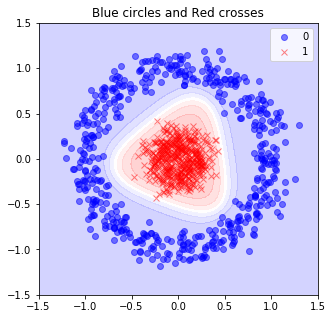

In [17]:
plt.figure(figsize=(5, 5))
plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.2)
plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.legend(['0', '1'])
plt.title("Blue circles and Red crosses")